<a href="https://colab.research.google.com/github/beomsik0210/C-/blob/main/python3_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
![alt_text].(./figs/mycnn.jpg)

/bin/bash: -c: line 0: syntax error near unexpected token `./figs/mycnn.jpg'
/bin/bash: -c: line 0: `[alt_text].(./figs/mycnn.jpg)'


In [3]:
mnist_train = dset.MNIST("", train = True, transform = transforms.ToTensor(), target_transform = None, download = True)
mnist_test = dset.MNIST("", train = False, transform = transforms.ToTensor(), target_transform = None, download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



mnist_train 길이:  60000
mnist_test 길이:  10000
image data 형태: torch.Size([1, 28, 28])
label 5


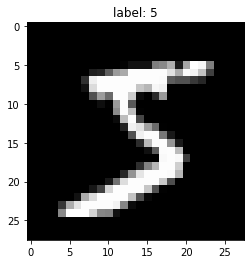

In [4]:
print("mnist_train 길이: ", len(mnist_train))
print("mnist_test 길이: ", len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태:", image.size())
print("label", label)

img = image.numpy()
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

5
torch.Size([1, 28, 28])
5


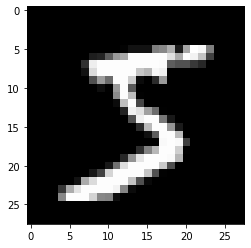

0


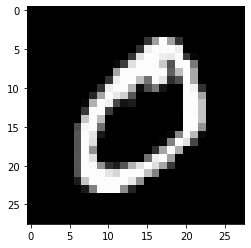

4


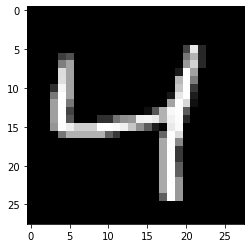

In [5]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
  img = mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0], cmap="gray")
  plt.show()

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


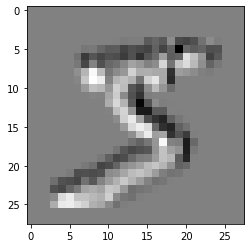

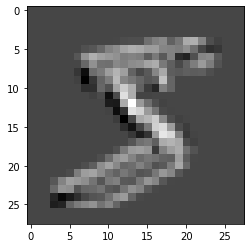

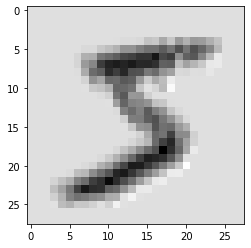

In [6]:
image, label = mnist_train[0]

image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print(label)

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)

output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
  plt.show()

In [7]:
import numpy as np
import torch.optim as optim

In [8]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [9]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size = batch_size,
                                           shuffle = True, num_workers=2,
                                           drop_last = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = batch_size,
                                          shuffle = False, num_workers=2,
                                          drop_last = True)

In [10]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1,16,5,padding=2),
        nn.ReLU(),
        
        nn.Conv2d(16,32,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

        nn.Conv2d(32,64,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc_layer=nn.Sequential(
        nn.Linear(64*7*7, 100),
        nn.ReLU(),
        nn.Linear(100,10)
    )

  def forward(self,x):
    out=self.layer(x)
    out=out.view(batch_size,-1)
    out=self.fc_layer(out)
    return out
    
model=CNN().cuda()

In [11]:
for parameter in model.parameters():
  print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [12]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = Variable(image).cuda()
    y_ = Variable(label).cuda()

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j%50 == 0:
      print(loss, j, i)

tensor(2.3148, device='cuda:0', grad_fn=<NllLossBackward0>) 0 0
tensor(1.7108, device='cuda:0', grad_fn=<NllLossBackward0>) 50 0
tensor(1.0725, device='cuda:0', grad_fn=<NllLossBackward0>) 0 1
tensor(0.1630, device='cuda:0', grad_fn=<NllLossBackward0>) 50 1
tensor(0.6931, device='cuda:0', grad_fn=<NllLossBackward0>) 0 2
tensor(0.5194, device='cuda:0', grad_fn=<NllLossBackward0>) 50 2
tensor(0.1154, device='cuda:0', grad_fn=<NllLossBackward0>) 0 3
tensor(0.3382, device='cuda:0', grad_fn=<NllLossBackward0>) 50 3
tensor(0.1527, device='cuda:0', grad_fn=<NllLossBackward0>) 0 4
tensor(0.1412, device='cuda:0', grad_fn=<NllLossBackward0>) 50 4
tensor(0.3023, device='cuda:0', grad_fn=<NllLossBackward0>) 0 5
tensor(0.0818, device='cuda:0', grad_fn=<NllLossBackward0>) 50 5
tensor(0.2491, device='cuda:0', grad_fn=<NllLossBackward0>) 0 6
tensor(0.0489, device='cuda:0', grad_fn=<NllLossBackward0>) 50 6
tensor(0.0371, device='cuda:0', grad_fn=<NllLossBackward0>) 0 7
tensor(0.0144, device='cuda:0', g

In [14]:
torch.save(model, '/content/sample_data/mycnn_model_%d.pkl' %(num_epoch))

In [15]:
try:
  model=troch.load('/content/sample_data/mycnn_model_10.pkl')
  print("model restored")
except:
  print("model not restored")

model not restored


In [16]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0

    for j, [imgs, labels] in enumerate(dloader):
      img = Variable(imgs).cuda()
      label = Variable(labels).cuda()

      output = imodel.forward(img)
      _, output_index = torch.max(output, 1)

      total += label.size(0)
      correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [17]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.43999481201172
